In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

p = 0.1
mask = (np.random.rand(10, 10) < p) / p
print(mask)
print(np.random.rand(10, 10))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  10.   0.]
 [ 10.   0.   0.  10.   0.   0.  10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  10.   0.]
 [  0.   0.  10.   0.   0.   0.   0.   0.   0.  10.]
 [  0.   0.   0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  10.   0.  10.   0.   0.]]
[[ 0.31386539  0.91685292  0.70151664  0.52653024  0.94251962  0.12731997
   0.78700346  0.26154568  0.37702179  0.66495977]
 [ 0.07649139  0.78385819  0.08190551  0.16747325  0.31319275  0.5816362
   0.94899805  0.14398155  0.72585574  0.95786266]
 [ 0.51451031  0.23800387  0.66007746  0.47510291  0.23850025  0.71114243
   0.1996562   0.78368476  0.40118988  0.69371909]
 [ 0.54131333  0.61954271  0.51188641  0.55692471  0.47097473  0.15541592
   0.85389469  0.5100

In [2]:
a = np.random.rand(1,2,3,3)
print(a)
print(a.shape)
print(a[:,1,2,2].shape)
b = (a[:,1,2,2])[:,None,None,None]
print(b)
print(b.shape)

[[[[ 0.17869961  0.83513078  0.08395244]
   [ 0.61019468  0.41107395  0.17933249]
   [ 0.00832236  0.48803199  0.77814172]]

  [[ 0.23887111  0.81644453  0.89053517]
   [ 0.2392573   0.98159241  0.33715527]
   [ 0.04783405  0.50090821  0.97806268]]]]
(1, 2, 3, 3)
(1,)
[[[[ 0.97806268]]]]
(1, 1, 1, 1)


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from classifiers.layers import *
from data_utils import load_CIFAR10
root = 'E:\jupyter\CS231n\Assignment2\data\cifar-10-batches-py'
X_train,Y_train,X_test,Y_test = load_CIFAR10(root)

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)
print(Y_test[0:10].shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(10,)


In [4]:
num_train = 49000
num_test = 1000
num_val = 1000

mask = range(num_train,num_train + num_val)
X_val = X_train[mask].transpose(0,3,1,2)
Y_val = Y_train[mask]

mask = range(num_train)
X_train = X_train[mask].transpose(0,3,1,2)
Y_train = Y_train[mask]


mask = range(num_test)
X_test = X_test[mask].transpose(0,3,1,2)
Y_test = Y_test[mask]

print('X_train.shape:',X_train.shape)
print('Y_train.shape:',Y_train.shape)
print('X_val.shape:',X_val.shape)
print('Y_val.shape:',Y_val.shape)
print('X_test.shape:',X_test.shape)
print('Y_test.shape:',Y_test.shape)

X_train.shape: (49000, 3, 32, 32)
Y_train.shape: (49000,)
X_val.shape: (1000, 3, 32, 32)
Y_val.shape: (1000,)
X_test.shape: (1000, 3, 32, 32)
Y_test.shape: (1000,)


In [5]:
num_inputs = 2
input_shape = (4,5,6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)#np.prod 将输入数据阶乘 4*5*6 = 120
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1,0.5,num = input_size).reshape(num_inputs,np.prod(input_shape))
w = np.linspace(-0.2,0.3,num = weight_size).reshape(np.prod(input_shape),output_dim)#np.linespace返回均匀分布的数字
b = np.linspace(-0.3,0.1,num = output_dim)

out, _ = affine_forward(x,w,b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

print(out)
print('difference: ', rel_error(out, correct_out))


[[ 1.49834967  1.70660132  1.91485297]
 [ 3.25553199  3.5141327   3.77273342]]
difference:  9.76985004799e-10


In [6]:
dout = np.random.randn(2,3)
_ , cache = affine_forward(x,w,b)
dx , dw , db = affine_backward(dout,cache)
print('dx:',dx.shape)
print('dw:',dw.shape)
print('db:',db.shape)

dx: (2, 120)
dw: (120, 3)
db: (3,)


In [7]:
#relu forward
x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 5e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.99999979802e-08


In [8]:
#relu backword
dout = np.random.randn(3,4)
print(dout)
_ , cache = relu_forward(x)
dx = relu_backward(dout,cache)
print(dx)

[[ 0.40814636 -0.16060356  1.89763488 -0.77478917]
 [ 1.05377796  0.75272363  0.54299242 -0.63660587]
 [ 0.59127077  1.61100027  0.45945157 -0.11953001]]
[[ 0.         -0.          0.         -0.        ]
 [ 0.          0.          0.54299242 -0.63660587]
 [ 0.59127077  1.61100027  0.45945157 -0.11953001]]


In [9]:
from classifiers.layer_utils import *

x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

print(dx)

[[-1.23859271  0.18014453 -0.18316137  1.00688365 -1.0997601  -1.68882094
  -0.66086043  0.93650696 -1.88781203  1.94855268 -0.55086491  0.95209643]
 [ 5.51766627  2.32700126  0.51411594 -3.13276163  2.01835176  0.18845974
   1.11904353 -0.05008564  1.60159885 -1.19655846 -1.80413463 -0.77770298]]


In [10]:
num_classes, num_inputs = 10 , 100
x = 0.01 * np.random.randn(num_inputs,num_classes)
y = np.random.randint(num_classes,size = num_inputs)

#print(y)
loss1 , dx1 = svm_loss(x,y)
loss2 , dx2 = softmax_loss(x,y)
print('svm loss:',loss1)
print('softmax loss:',loss2)

svm loss: 9.00467227917
softmax loss: 2.30309662441


In [11]:
from classifiers.fc_net import *
#Two Layers Network
N,D,H,C = 3,5,50,7
X = np.random.randn(N , D)
Y = np.random.randint(C,size = N)
std = 1e-3

model = TwoLayerNet(input_dim = D,hidden_dim = H,num_classes = C,weight_scale = std)

print('Testing initialization ... ')
W1_std = abs(model.param['W1'].std() - std)#std计算标准差
print(W1_std)
b1 = model.param['b1']
W2_std = abs(model.param['W2'].std() - std)
b2 = model.param['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.param['W1'] = np.linspace(-0.7,0.3,num=D*H).reshape(D,H)
model.param['b1'] = np.linspace(-0.1,0.9,num=H)
model.param['W2'] = np.linspace(-0.3,0.4,num=H*C).reshape(H,C)
model.param['b2'] = np.linspace(-0.9,0.1,num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T#此产生X的方式loss小多了（WHY？？）
#X = np.linspace(-5.5,4.5,num=N*D).reshape(N,D)
#此时因为没有y 所以loss返回的是scores
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
print(scores_diff)
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.array([0,5,1])
loss , grads = model.loss(X,y)
print(loss)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

print('add regularization')
model.reg = 1.0
loss, grads = model.loss(X, y)
print(loss)
correct_loss = 26.5948426952
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

for reg in [0.0, 0.7]:
    print('Running numeric gradient check with reg = ', reg)
    model.reg = reg
    loss, grads = model.loss(X, y)
    print(loss)
    #print(grads)

Testing initialization ... 
5.25827860634e-05
Testing test-time forward pass ... 
5.11584996588e-08
Testing training loss (no regularization)
3.4702243556
add regularization
26.5948426952
Running numeric gradient check with reg =  0.0
3.4702243556
Running numeric gradient check with reg =  0.7
19.6574571933


In [12]:
from solver import Solver
data = {'X_train':X_train,'y_train':Y_train,'X_val':X_val,'y_val':Y_val,'X_test':X_test,'y_test':Y_test}
for k, v in list(data.items()):
    print(('%s: ' % k, v.shape))
    
model1 = TwoLayerNet()
    
solver = Solver(model1, data,
                update_rule='sgd',
                optim_config={
                    'learning_rate': 1e-3,
                },
                lr_decay=0.90,
                num_epochs=10, batch_size=100,
                print_every=100)
solver.train()

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))
(Iteration 1 / 4900) loss: 2.299551
(Epoch 0 / 10) train acc: 0.100000; val_acc: 0.079000
(Iteration 101 / 4900) loss: 2.147162
(Iteration 201 / 4900) loss: 2.164587
(Iteration 301 / 4900) loss: 2.157159
(Iteration 401 / 4900) loss: 2.316699
(Epoch 1 / 10) train acc: 0.173000; val_acc: 0.167000
(Iteration 501 / 4900) loss: 2.100350
(Iteration 601 / 4900) loss: 2.245632
(Iteration 701 / 4900) loss: 2.142846
(Iteration 801 / 4900) loss: 2.162915
(Iteration 901 / 4900) loss: 2.230451
(Epoch 2 / 10) train acc: 0.223000; val_acc: 0.222000
(Iteration 1001 / 4900) loss: 2.109909
(Iteration 1101 / 4900) loss: 1.997790
(Iteration 1201 / 4900) loss: 1.949658
(Iteration 1301 / 4900) loss: 1.830032
(Iteration 1401 / 4900) loss: 2.191567
(Epoch 3 / 10) train acc: 0.285000; val_acc: 0.253000
(Iteration 1501 / 4900) loss: 1.957136
(Iterati

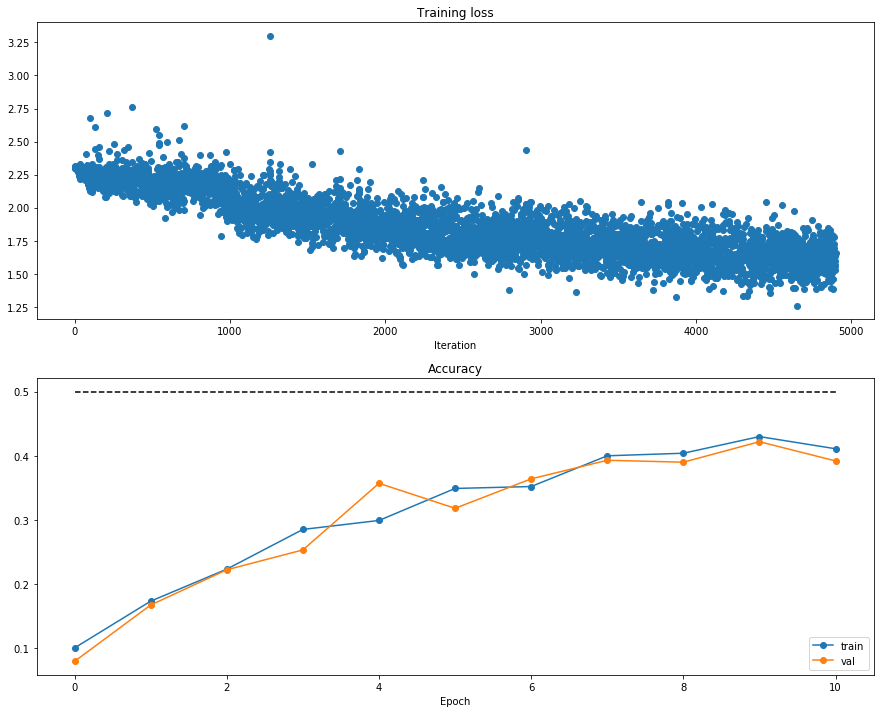

In [16]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')#画一跟0.5的线
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

In [12]:
from classifiers.fc_net import *
np.random.seed(231)
N,D,H1,H2,C = 2,15,20,30,10
X = np.random.randn(N,D)
Y = np.random.randint(C,size=(N,))

for reg in [0,3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)
    
    loss , grads = model.loss(X,Y)
    print('Initial loss:',loss)
    

Running check with reg =  0
Initial loss: 2.30047908977
Running check with reg =  3.14
Initial loss: 7.05211477653


(Iteration 1 / 40) loss: 2.297886
(Epoch 0 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 1 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 2 / 20) train acc: 0.160000; val_acc: 0.077000
(Epoch 3 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 4 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 5 / 20) train acc: 0.160000; val_acc: 0.079000
(Iteration 11 / 40) loss: 2.276267
(Epoch 6 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 7 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 8 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 9 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 10 / 20) train acc: 0.200000; val_acc: 0.085000
(Iteration 21 / 40) loss: 2.200415
(Epoch 11 / 20) train acc: 0.180000; val_acc: 0.115000
(Epoch 12 / 20) train acc: 0.180000; val_acc: 0.080000
(Epoch 13 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 14 / 20) train acc: 0.160000; val_acc: 0.079000
(Epoch 15 / 20) train acc: 0.160000; val_acc: 0.079000
(Iteration 31 / 40) loss: 

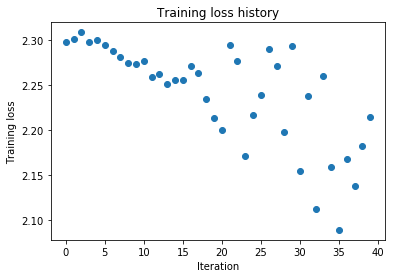

In [16]:
from classifiers.fc_net import *
from solver import Solver
data = {'X_train':X_train,'y_train':Y_train,'X_val':X_val,'y_val':Y_val,'X_test':X_test,'y_test':Y_test}

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-2
learning_rate = 8e-3
model = FullyConnectedNet([100,100,100],weight_scale=weight_scale,dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

(Iteration 1 / 40) loss: 151.380668
(Epoch 0 / 20) train acc: 0.100000; val_acc: 0.107000
(Epoch 1 / 20) train acc: 0.100000; val_acc: 0.133000
(Epoch 2 / 20) train acc: 0.200000; val_acc: 0.088000
(Epoch 3 / 20) train acc: 0.200000; val_acc: 0.123000
(Epoch 4 / 20) train acc: 0.320000; val_acc: 0.095000
(Epoch 5 / 20) train acc: 0.260000; val_acc: 0.138000
(Iteration 11 / 40) loss: 4.561890
(Epoch 6 / 20) train acc: 0.440000; val_acc: 0.115000
(Epoch 7 / 20) train acc: 0.560000; val_acc: 0.118000
(Epoch 8 / 20) train acc: 0.440000; val_acc: 0.111000
(Epoch 9 / 20) train acc: 0.620000; val_acc: 0.106000
(Epoch 10 / 20) train acc: 0.720000; val_acc: 0.120000
(Iteration 21 / 40) loss: 0.836538
(Epoch 11 / 20) train acc: 0.520000; val_acc: 0.101000
(Epoch 12 / 20) train acc: 0.620000; val_acc: 0.111000
(Epoch 13 / 20) train acc: 0.740000; val_acc: 0.112000
(Epoch 14 / 20) train acc: 0.900000; val_acc: 0.114000
(Epoch 15 / 20) train acc: 0.920000; val_acc: 0.111000
(Iteration 31 / 40) loss

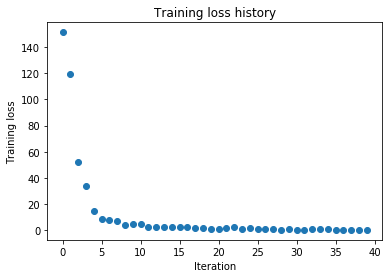

In [15]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1e-1
learning_rate = 1e-3

model = FullyConnectedNet([100, 100, 100, 100,100,100,100],
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

running with  sgd
(Iteration 1 / 200) loss: 2.313231
(Epoch 0 / 5) train acc: 0.111000; val_acc: 0.110000
(Iteration 11 / 200) loss: 2.267307
(Iteration 21 / 200) loss: 2.281350
(Iteration 31 / 200) loss: 2.308905
(Epoch 1 / 5) train acc: 0.152000; val_acc: 0.136000
(Iteration 41 / 200) loss: 2.272669
(Iteration 51 / 200) loss: 2.230496
(Iteration 61 / 200) loss: 2.196581
(Iteration 71 / 200) loss: 2.126242
(Epoch 2 / 5) train acc: 0.200000; val_acc: 0.176000
(Iteration 81 / 200) loss: 2.242277
(Iteration 91 / 200) loss: 2.061649
(Iteration 101 / 200) loss: 2.125951
(Iteration 111 / 200) loss: 2.095385
(Epoch 3 / 5) train acc: 0.208000; val_acc: 0.227000
(Iteration 121 / 200) loss: 2.082299
(Iteration 131 / 200) loss: 2.222767
(Iteration 141 / 200) loss: 2.097078
(Iteration 151 / 200) loss: 2.073224
(Epoch 4 / 5) train acc: 0.251000; val_acc: 0.254000
(Iteration 161 / 200) loss: 1.954759
(Iteration 171 / 200) loss: 2.024562
(Iteration 181 / 200) loss: 1.987313
(Iteration 191 / 200) los

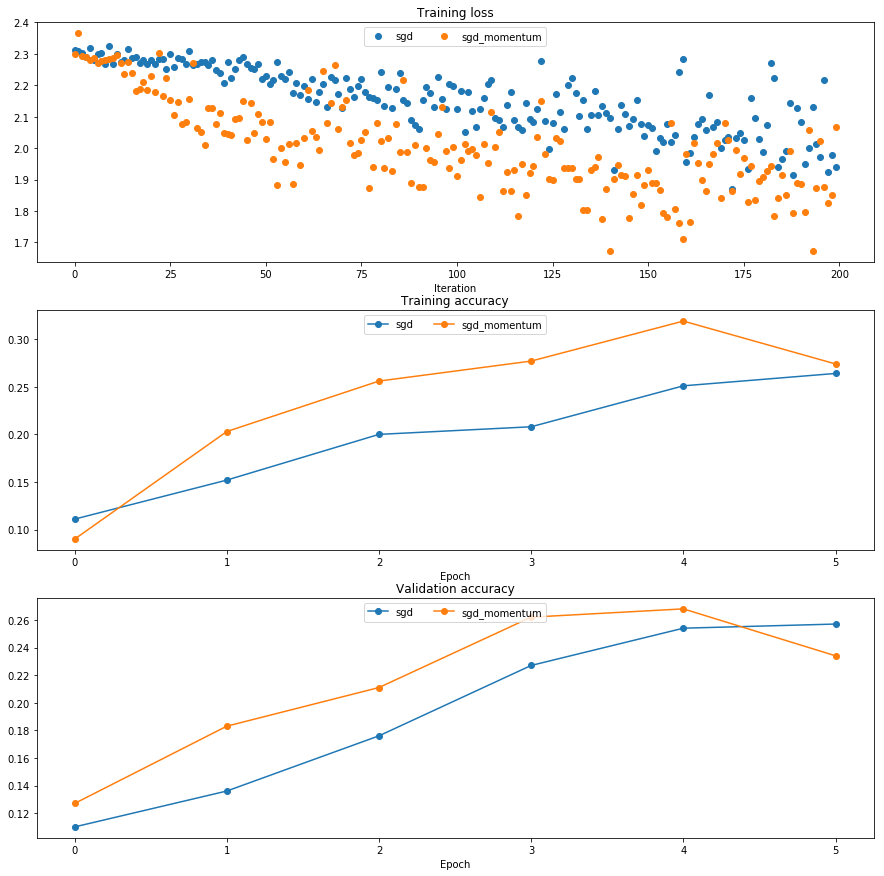

In [21]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100,100,100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
    
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)#o表示圆点 -o表示圆点之间有连线
    
    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)#对同一张图片的不同曲线进行label不同化
plt.gcf().set_size_inches(15, 15)#指定输出图片尺寸
plt.show()

running with  adam
(Iteration 1 / 200) loss: 2.352271
(Epoch 0 / 5) train acc: 0.124000; val_acc: 0.115000
(Iteration 11 / 200) loss: 2.350695
(Iteration 21 / 200) loss: 2.297782
(Iteration 31 / 200) loss: 2.290474
(Epoch 1 / 5) train acc: 0.106000; val_acc: 0.078000
(Iteration 41 / 200) loss: 2.308752
(Iteration 51 / 200) loss: 2.235604
(Iteration 61 / 200) loss: 2.307050
(Iteration 71 / 200) loss: 2.291046
(Epoch 2 / 5) train acc: 0.148000; val_acc: 0.159000
(Iteration 81 / 200) loss: 2.276181
(Iteration 91 / 200) loss: 2.178270
(Iteration 101 / 200) loss: 2.242121
(Iteration 111 / 200) loss: 2.154512
(Epoch 3 / 5) train acc: 0.167000; val_acc: 0.183000
(Iteration 121 / 200) loss: 2.199198
(Iteration 131 / 200) loss: 2.089040
(Iteration 141 / 200) loss: 2.066794
(Iteration 151 / 200) loss: 2.056734
(Epoch 4 / 5) train acc: 0.193000; val_acc: 0.193000
(Iteration 161 / 200) loss: 2.237092
(Iteration 171 / 200) loss: 2.114888
(Iteration 181 / 200) loss: 2.043007
(Iteration 191 / 200) lo

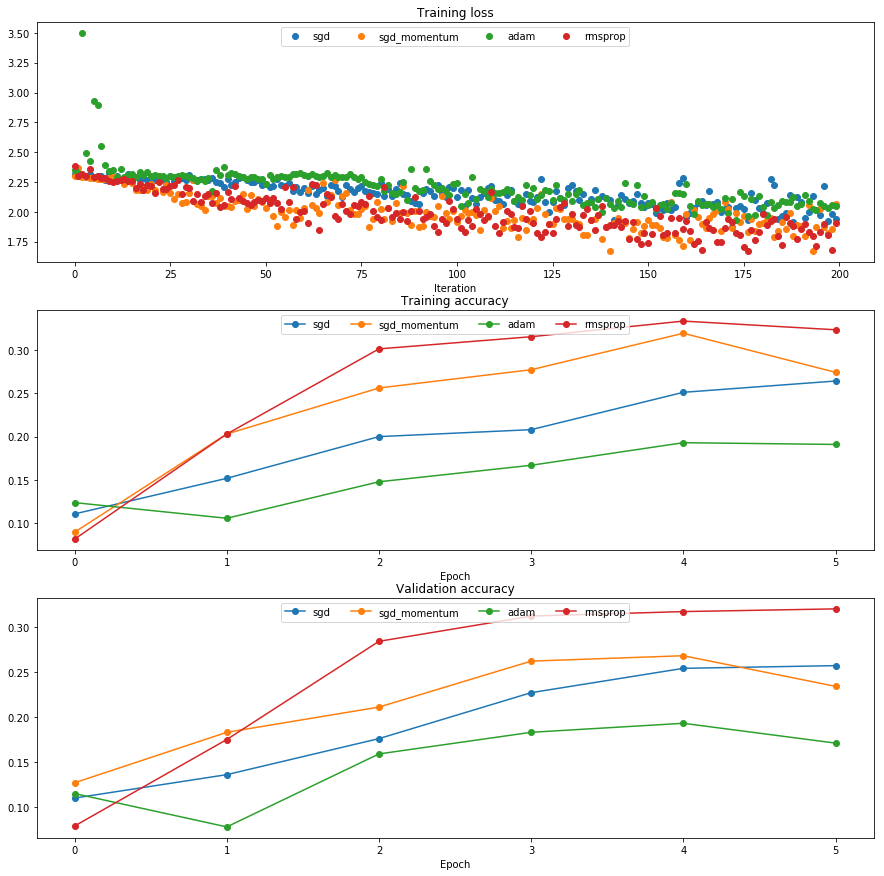

In [23]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
    print('running with ', update_rule)
    model = FullyConnectedNet([100, 100, 100, 100, 100,100,100], weight_scale=5e-2)

    solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
    solvers[update_rule] = solver
    solver.train()
    print()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=update_rule)
    
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=update_rule)
    
    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=update_rule)

for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

(Iteration 1 / 2450) loss: 2.290709
(Epoch 0 / 5) train acc: 0.103000; val_acc: 0.107000
(Epoch 1 / 5) train acc: 0.391000; val_acc: 0.401000
(Iteration 501 / 2450) loss: 1.744946
(Epoch 2 / 5) train acc: 0.415000; val_acc: 0.417000
(Iteration 1001 / 2450) loss: 1.500967
(Epoch 3 / 5) train acc: 0.467000; val_acc: 0.457000
(Iteration 1501 / 2450) loss: 1.529496
(Epoch 4 / 5) train acc: 0.499000; val_acc: 0.471000
(Iteration 2001 / 2450) loss: 1.598834
(Epoch 5 / 5) train acc: 0.465000; val_acc: 0.468000


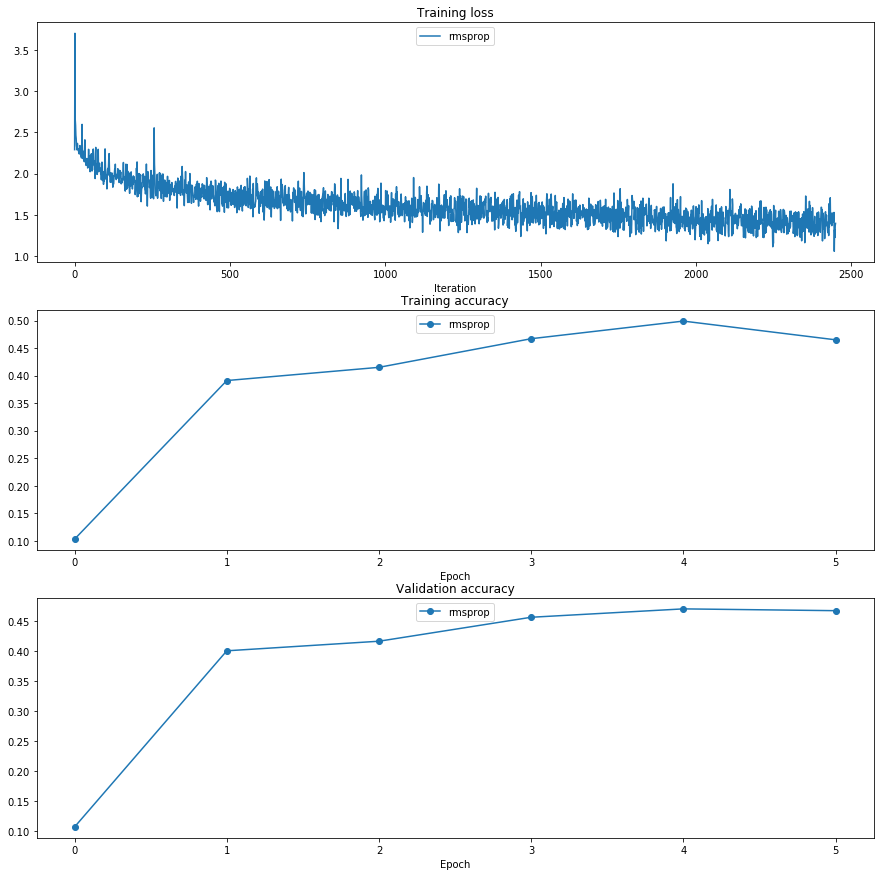

In [25]:
best_model = None

weight_scale = 2e-2
learning_rate = 1e-4
update_rule='rmsprop'
model = FullyConnectedNet([600, 500, 400, 300, 200], weight_scale=weight_scale)

solver = Solver(model, data,
                print_every=500, num_epochs=5, batch_size=100,
                update_rule='rmsprop',
                optim_config={
                'learning_rate': learning_rate
                },
                lr_decay=0.9,
                verbose=True)
solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label=update_rule)
  
plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o', label=update_rule)

plt.subplot(3, 1, 3)
plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

(Iteration 1 / 2450) loss: 2.341934
(Epoch 0 / 5) train acc: 0.114000; val_acc: 0.113000
(Epoch 1 / 5) train acc: 0.369000; val_acc: 0.385000
(Iteration 501 / 2450) loss: 1.783259
(Epoch 2 / 5) train acc: 0.406000; val_acc: 0.426000
(Iteration 1001 / 2450) loss: 1.762880
(Epoch 3 / 5) train acc: 0.456000; val_acc: 0.448000
(Iteration 1501 / 2450) loss: 1.660174
(Epoch 4 / 5) train acc: 0.461000; val_acc: 0.461000
(Iteration 2001 / 2450) loss: 1.493106
(Epoch 5 / 5) train acc: 0.458000; val_acc: 0.473000


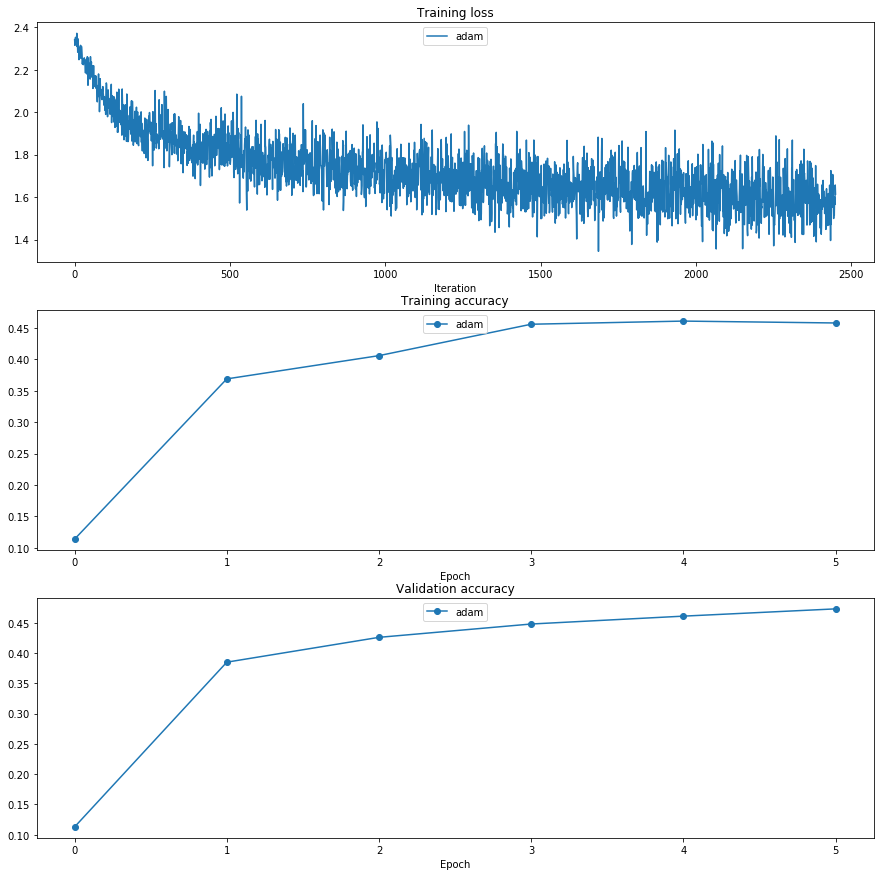

In [27]:

weight_scale = 2e-2
learning_rate = 1e-4
update_rule='adam'
model = FullyConnectedNet([600, 500, 400, 300, 200], weight_scale=weight_scale,use_batchnorm=True,dropout=0.5)

solver = Solver(model, data,
                print_every=500, num_epochs=5, batch_size=100,
                update_rule='adam',
                optim_config={
                'learning_rate': learning_rate
                },
                lr_decay=0.9,
                verbose=True)
solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label=update_rule)
  
plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o', label=update_rule)

plt.subplot(3, 1, 3)
plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

In [28]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.473
Test set accuracy:  0.469


(Iteration 1 / 2450) loss: 2.312271
(Epoch 0 / 5) train acc: 0.105000; val_acc: 0.115000
(Epoch 1 / 5) train acc: 0.478000; val_acc: 0.460000
(Iteration 501 / 2450) loss: 1.503118
(Epoch 2 / 5) train acc: 0.557000; val_acc: 0.488000
(Iteration 1001 / 2450) loss: 1.164866
(Epoch 3 / 5) train acc: 0.636000; val_acc: 0.535000
(Iteration 1501 / 2450) loss: 1.150767
(Epoch 4 / 5) train acc: 0.662000; val_acc: 0.550000
(Iteration 2001 / 2450) loss: 0.894646
(Epoch 5 / 5) train acc: 0.716000; val_acc: 0.539000


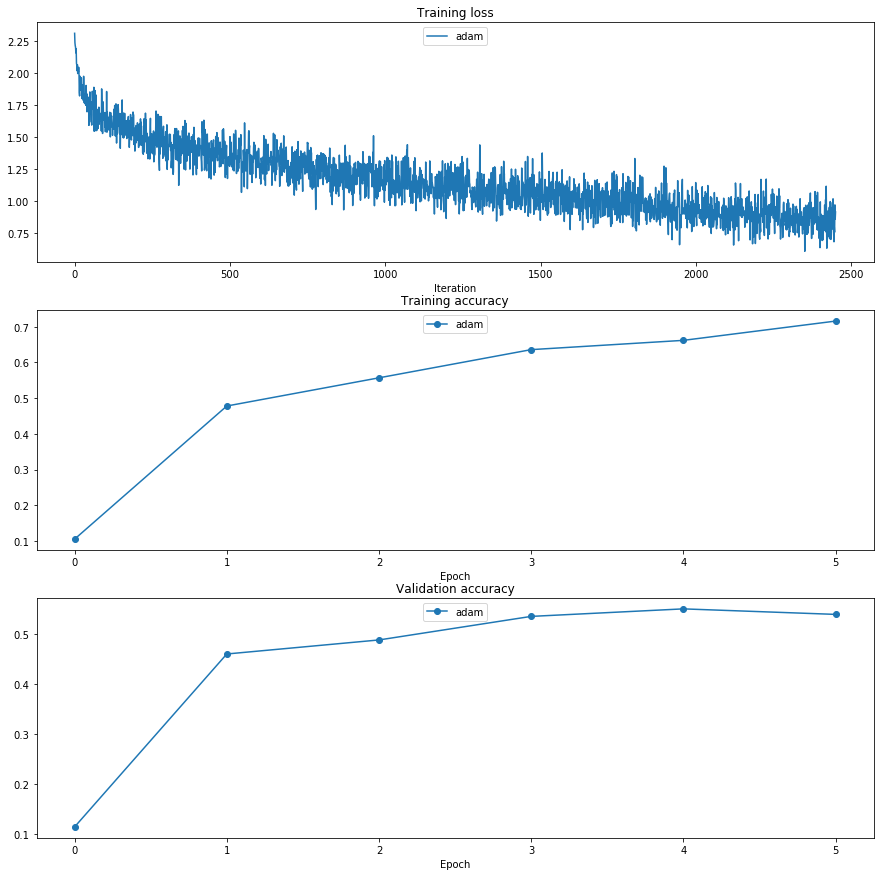

In [29]:
weight_scale = 2e-2
learning_rate = 1e-4
update_rule='adam'
model = FullyConnectedNet([600, 500, 400, 300, 200], weight_scale=weight_scale,use_batchnorm=True)

solver = Solver(model, data,
                print_every=500, num_epochs=5, batch_size=100,
                update_rule='adam',
                optim_config={
                'learning_rate': learning_rate
                },
                lr_decay=0.9,
                verbose=True)
solver.train()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, label=update_rule)
  
plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o', label=update_rule)

plt.subplot(3, 1, 3)
plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

In [30]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.423
Test set accuracy:  0.404
